In [1]:
import pandas as pd
import numpy as np

# 10.9.1 A Single Layer Network on the Hitters Data

In [ ]:
Gitters = pd.read_csv('/Users/rancher/Google Drive/Coding/ISLR2/datasets/Hitters.csv')

In [ ]:
Gitters = Gitters.dropna()

# R starts indexing at 1, Python starts indexing at 0, this is to make sure the indices of the dataframes match
Gitters = Gitters.set_index(keys=np.arange(1,264)) 

In [ ]:
n = Gitters.shape[0]

In [ ]:
ntest = n // 3

In [2]:
import rpy2.robjects as robjects

data = robjects.r("""
library(ISLR2)
n <- nrow(na.omit(Hitters))
set.seed(13)
ntest <- trunc(n / 3)
testid <- sample(1:n, ntest)
""")

testid = np.sort(np.array(data))

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
test_mask = Gitters.index.isin(testid)

In [ ]:
def formula_from_cols(df, y):
    return y + ' ~ ' + ' + '.join([col for col in df.columns if not col==y])

In [ ]:
formula_string = formula_from_cols(Gitters, 'Salary')

In [ ]:
lmodel = smf.ols(formula=formula_string, data = sm.add_constant(Gitters[~test_mask]))

lfit = lmodel.fit()

In [ ]:
lpred = lfit.predict(Gitters[test_mask])

In [ ]:
np.mean(abs(lpred - Gitters[test_mask]['Salary']))

In [ ]:
import patsy

In [ ]:
x = patsy.dmatrices(formula_string + "-1", Gitters)

In [ ]:
x_scale = patsy.scale(x[1])

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
X_train = x_scale[~test_mask]
X_test = x_scale[test_mask]

In [ ]:
y_train = Gitters[~test_mask]['Salary']
y_test = Gitters[test_mask]['Salary']

In [ ]:
import sklearn

In [ ]:
ridge_cv = RidgeCV(scoring='neg_mean_absolute_error').fit(X_train, y_train)

In [ ]:
for key in sklearn.metrics.SCORERS.keys():
    print(key)

In [ ]:
rpred = ridge_cv.predict(X_test)
rpred

In [ ]:
np.mean(abs(y_test - rpred))

In [10]:
import tensorflow as tf
#from tensorflow import keras
import tensorflow.keras as keras
from tensorflow.keras import layers

2022-12-03 22:55:26.212633: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
modnn = keras.Sequential(
    [
            layers.Dense(units = 50, activation='relu'),
            layers.Dropout(rate=0.4),
            layers.Dense(units=1)
    ]
)

In [ ]:
modnn.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='rmsprop', metrics=tf.keras.losses.MeanAbsoluteError())

In [ ]:
history = modnn.fit(X_train, y_train, epochs=1500, batch_size=32, validation_data=(X_test, y_test))

In [3]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation']);

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_abs_error')
plt.ylabel('mean_abs_error')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation']);

In [ ]:
npred = modnn.predict(X_test)

In [ ]:
np.mean(abs(y_test - npred.flatten()))

# 10.9.2 A Multilayer Network on the MNIST Digit Data

In [ ]:
(x_train, g_train), (x_test, g_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
x_train = np.reshape(x_train, newshape=(x_train.shape[0], 784))
x_test = np.reshape(x_test, newshape=(x_test.shape[0], 784))

In [ ]:
# y_train = pd.get_dummies(g_train)
# y_test = pd.get_dummies(g_test)

y_train = keras.utils.to_categorical(g_train)
y_test = keras.utils.to_categorical(g_test)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
modelnn = keras.Sequential(
    [
            layers.Dense(units=256, activation='relu'),
            layers.Dropout(rate=0.4),
            layers.Dense(units=128, activation='relu'),
            layers.Dropout(rate=0.3),
            layers.Dense(units=10, activation='softmax')
    ]
)

In [ ]:
modelnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics='accuracy')

In [ ]:
history = modelnn.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

In [ ]:
modelnn.summary()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation']);

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation']);

In [ ]:
y_proba = modelnn.predict(x_test)
y_pred_classes = np.argmax(y_proba, axis=1)

In [ ]:
modelnn_acc = np.mean(y_pred_classes == g_test)
modelnn_acc

## Multiclass Logistic Regressions

In [ ]:
modellr = keras.models.Sequential(
    [
            layers.Dense(units=10, activation='softmax')
    ]
)

In [ ]:
modellr.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics='accuracy')

In [ ]:
modellr.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

In [ ]:
y_proba = modellr.predict(x_test)
y_pred_classes = np.argmax(y_proba, axis=1)

In [ ]:
modellr_acc = np.mean(y_pred_classes == g_test)
modellr_acc

# 10.9.3 Convolutional Neural Networks

In [ ]:
(x_train, g_train), (x_test, g_test) = keras.datasets.cifar100.load_data()

In [ ]:
x_train.shape

In [ ]:
range(x_train)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255
y_train = keras.utils.to_categorical(g_train, num_classes=100)

In [ ]:
y_train.shape

In [ ]:
type(x_train)

In [ ]:
# Code taken from https://www.binarystudy.com/2021/09/how-to-load-preprocess-visualize-CIFAR-10-and-CIFAR-100.html#cifar100-single
rows, columns = 5,5
rand_idx = np.random.randint(0, 50000, rows * columns)
rand_images = x_train[rand_idx]
fig = plt.figure(figsize=(8,10))
for i in range(1, columns * rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(rand_images[i-1])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
model = keras.models.Sequential(
    [
        layers.Conv2D(filters=32, kernel_size=(3,3),
                     padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(filters=64, kernel_size=(3,3),
                     padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(filters=128, kernel_size=(3,3),
                     padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(rate=0.5),
        layers.Dense(units=512, activation='relu'),
        layers.Dense(units=100, activation='softmax')
    ]
)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics='accuracy')

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

In [ ]:
model.summary()

In [ ]:
y_proba = model.predict(x_test)
y_pred_classes = np.argmax(y_proba, axis=-1)

In [ ]:
np.mean(y_pred_classes == g_test.flatten())

# 10.9.4 Using Pretrained CNN Models

In [ ]:
import os

from keras.preprocessing import image as image_utils
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input

In [ ]:
img_dir = '/Users/rancher/Google Drive/Coding/ISLR2/Python/chp10/labs/book_images'

In [ ]:
image_names = os.listdir(img_dir)

In [ ]:
num_images = len(image_names)

In [ ]:
x = []
for img_name in image_names:
    img_path = img_dir + '/' + img_name
    img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    x.append(keras.preprocessing.image.img_to_array(img))
    
x = np.array(x)

In [ ]:
x = preprocess_input(x)

In [ ]:
model = keras.applications.resnet50.ResNet50(weights='imagenet')

model.summary()

In [ ]:
pred6 = model.predict(x)

In [ ]:
keras.applications.imagenet_utils.decode_predictions(pred6, top=3)

# 10.9.5 IMDb Document Classification

In [56]:
max_features = 10_000
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)

In [57]:
test_text = x_train[0][0:12]
test_text

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468]

In [58]:
word_index = keras.datasets.imdb.get_word_index()

In [59]:
def decode_review(text: list, word_index: dict):
    new_strings = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
    
    # word_index_copy = word_index.copy()
    idx = list(word_index.values())
    idx_plus_3 = np.array(idx) + 3
    new_idx = np.append(np.arange(0,4), idx_plus_3)
    new_idx = list(new_idx)
    
    
    # word = list(word_index.keys())
    # word = np.array(word)
    # word = np.append(new_strings, word)
    
    word = list(word_index.keys())
    word = new_strings + word
    
    words = []
    
    for word_val in text:
        if word_val not in new_idx:
            word_val = 2 #use idx 2 to return "<UNK>"
            # words += word[new_idx.index(word_val)]
        words.append(word[new_idx.index(word_val)])
        # else:
        #     # words += word[new_idx.index(2)] # If word_val not found, use idx 2 to return "<UNK>"
        #      words.append(word[new_idx.index(2)]) # If word_val not found, use idx 2 to return "<UNK>"
    
    print(" ".join(words))
    # list(word_index.keys())[list(word_index.values()).index(34701)]

In [60]:
decode_review(test_text, word_index)

<START> this film was just brilliant casting location scenery story direction everyone's


In [61]:
# new_strings = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
# word_index_copy = word_index.copy()
# indices = list(word_index.values())
# indices_plus_3 = np.array(indices) + 3
# new_indices = np.append(np.arange(0,4), indices_plus_3)

# for i, string in enumerate(new_strings):
#     word_index_copy[string] = i

In [62]:
# def decode_review(text: list, word_index: dict) -> str:
#     word_index_copy = word_index.copy()
#     for key, value in word_index_copy.items():
#         word_index_copy[key] = value + 3
#         #print(word_index_copy[key])

#     new_strings = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
#     for i, string in enumerate(new_strings):
#         word_index_copy[string] = i
        
#     words = []
#     for word in text:
        

In [63]:
from scipy import sparse
from itertools import chain

In [99]:
def one_hot(sequences, dimension):
    from scipy import sparse
    
    seqlen = np.array([], dtype=np.int64)
    for seq in sequences:
        seqlen = np.append(seqlen, len(seq))
    
    n = len(seqlen)
    
    rowind = np.repeat(np.arange(0, n), repeats=seqlen)
    colind = np.array(list(chain(*sequences)))
    
    sparse_matrix = sparse.coo_matrix((np.ones(len(rowind)), (rowind, colind)), shape=(n, dimension))
    
    return sparse_matrix

In [101]:
x_train_1h = one_hot(x_train, 10000)
x_test_1h = one_hot(x_test, 10000)

In [301]:
x_train_1h.tocsr()

<25000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3292468 stored elements in Compressed Sparse Row format>

In [302]:
a_train_1h

<25000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3292468 stored elements in COOrdinate format>

In [184]:
seqlen = np.array([], dtype=np.int64)
for seq in x_train:
    seqlen = np.append(seqlen, len(seq))

n = len(seqlen)

rowind = np.repeat(np.arange(0, n), repeats=seqlen)
colind = np.array(list(chain(*x_train)))

In [185]:
rowind

array([    0,     0,     0, ..., 24999, 24999, 24999])

In [186]:
np.unique(rowind, return_counts=True)[1][310]

164

In [187]:
colind

array([  1,  14,  22, ..., 204, 131,   9])

In [188]:
np.unique(colind, return_counts=True)

(array([   1,    2,    4, ..., 9997, 9998, 9999]),
 array([ 25000, 341611, 336148, ...,     31,     31,     31]))

In [270]:
a = np.zeros(shape=(25000, 10000))
a[rowind, colind] = 1

ival_mask = pd.DataFrame(a).index.isin(ival)

a_train_1h = sparse.coo_matrix(a)

In [273]:
a_train_1h.tocsr()[~ival_mask]

<23000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3026139 stored elements in Compressed Sparse Row format>

In [212]:
x_train_1h_test.tocsr()[~ival]

<2000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 264024 stored elements in Compressed Sparse Row format>

In [219]:
ival_mask = pd.DataFrame(a).index.isin(ival)

In [223]:
a[ival_mask].shape

(2000, 10000)

In [224]:
a[~ival_mask].shape

(23000, 10000)

In [227]:
y_train[ival_mask].shape

(2000,)

In [229]:
y_train[~ival_mask].shape

(23000,)

In [254]:
a_sum = a.sum(axis=1)

In [263]:
a_sum[7]

294.0

In [247]:
a.shape

(25000, 10000)

In [206]:
test_mask = a.index.isin(ival)
a[test_mask].shape

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [196]:
x_train_1h_test.sum()

3292468.0

In [152]:
x_train_1h_array = x_train_1h.toarray()
x_train_1h_array[x_train_1h_array != 0] = 1
x_train_1h_test = sparse.coo_matrix(x_train_1h_array)

x_test_1h_array = x_test_1h.toarray()
x_test_1h_array[x_test_1h_array != 0] = 1
x_test_1h_test = sparse.coo_matrix(x_test_1h_array)

array([False, False, False, ...,  True, False, False])

In [177]:
x_train_1h_test.toarray()[0]

10000

In [147]:
x_train_1h.tocsr()[rowind, colind]

matrix([[1., 3., 6., ..., 3., 1., 5.]])

In [132]:
for i in rowind:
    for j in colind:
        x_train_1h.tolil()[i, j] = 1
x_train_1h.tocsr()[rowind, colind]

KeyboardInterrupt: 

In [143]:
x_train_1h.tolil()[0,2]

6.0

In [117]:
x_train_1h.tocsr()[rowind, colind].sum()

38124379.0

In [119]:
x_train_1h.tocsr().nonzero()

(array([    0,     0,     0, ..., 24999, 24999, 24999], dtype=int32),
 array([   1,    2,    4, ..., 8778, 9245, 9685], dtype=int32))

In [118]:
x_train_1h.tocsr()[x_train_1h.tocsr().nonzero()].sum()

5967841.0

In [113]:
x_train_1h.tocsr().nonzero()

(array([    0,     0,     0, ..., 24999, 24999, 24999], dtype=int32),
 array([   1,    2,    4, ..., 8778, 9245, 9685], dtype=int32))

In [125]:
x_train_1h.toarray()[2]

array([0., 1., 2., ..., 0., 0., 0.])

In [111]:
x_train_1h.toarray()

array([[ 0.,  1.,  6., ...,  0.,  0.,  0.],
       [ 0.,  1.,  7., ...,  0.,  0.,  0.],
       [ 0.,  1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1., 14., ...,  0.,  0.,  0.],
       [ 0.,  1.,  5., ...,  0.,  0.,  0.],
       [ 0.,  1., 12., ...,  0.,  0.,  0.]])

In [66]:
x_train_1h.shape

(25000, 10000)

In [67]:
x_train_1h.count_nonzero() / (25000 * 10000)

0.013169872

In [68]:
import rpy2.robjects as robjects

data = robjects.r("""
set.seed(3)
ival <- sample(seq(1:25000), 2000)
""")

ival = np.sort(np.array(data))

In [69]:
import glmnet_python
from glmnet import glmnet; from glmnetPlot import glmnetPlot
from glmnetPrint import glmnetPrint; from glmnetCoef import glmnetCoef; from glmnetPredict import glmnetPredict
from cvglmnet import cvglmnet; from cvglmnetCoef import cvglmnetCoef
from cvglmnetPlot import cvglmnetPlot; from cvglmnetPredict import cvglmnetPredict

In [70]:
x_train_1h.tocsr()[ival].tocoo().toarray()

array([[ 0.,  1., 10., ...,  0.,  0.,  0.],
       [ 0.,  1., 28., ...,  0.,  0.,  0.],
       [ 0.,  1.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1.,  9., ...,  0.,  0.,  0.],
       [ 0.,  1., 11., ...,  0.,  0.,  0.],
       [ 0.,  1., 14., ...,  0.,  0.,  0.]])

In [274]:
# fitlm = glmnet(x=x_train_1h_test.tocsr()[-ival].toarray(), y=y_train[-ival].astype(np.float64), family='binomial', standardize=False)

fitlm = glmnet(x=a_train_1h.tocsr()[~ival_mask].toarray(), y=y_train[~ival_mask].astype(np.float64), family='binomial', standardize=False)

ValueError: x input must be a scipy float64 ndarray

In [275]:
classlmv = glmnetPredict(fitlm, a[ival_mask]) > 0

In [276]:
classlmv[:,99]

array([False, False,  True, ...,  True, False, False])

In [277]:
fitlm.keys()

dict_keys(['a0', 'label', 'beta', 'dev', 'nulldev', 'df', 'lambdau', 'npasses', 'jerr', 'dim', 'offset', 'class'])

In [278]:
-np.log(fitlm['lambdau'])

array([ 2.8395692 ,  2.93260294,  3.02563668,  3.11867042,  3.21170416,
        3.3047379 ,  3.39777165,  3.49080539,  3.58383913,  3.67687287,
        3.76990661,  3.86294035,  3.95597409,  4.04900783,  4.14204158,
        4.23507532,  4.32810906,  4.4211428 ,  4.51417654,  4.60721028,
        4.70024402,  4.79327776,  4.8863115 ,  4.97934525,  5.07237899,
        5.16541273,  5.25844647,  5.35148021,  5.44451395,  5.53754769,
        5.63058143,  5.72361517,  5.81664892,  5.90968266,  6.0027164 ,
        6.09575014,  6.18878388,  6.28181762,  6.37485136,  6.4678851 ,
        6.56091884,  6.65395259,  6.74698633,  6.84002007,  6.93305381,
        7.02608755,  7.11912129,  7.21215503,  7.30518877,  7.39822251,
        7.49125626,  7.58429   ,  7.67732374,  7.77035748,  7.86339122,
        7.95642496,  8.0494587 ,  8.14249244,  8.23552618,  8.32855993,
        8.42159367,  8.51462741,  8.60766115,  8.70069489,  8.79372863,
        8.88676237,  8.97979611,  9.07282985,  9.1658636 ,  9.25

In [279]:
acclmv = []
for i in range(100):
    acc = np.mean(classlmv[:, i] == (y_train[ival_mask] > 0))
    acclmv.append(acc)

In [280]:
acclmv

[0.4955,
 0.6105,
 0.6105,
 0.6105,
 0.6105,
 0.6105,
 0.6105,
 0.639,
 0.639,
 0.639,
 0.66,
 0.6815,
 0.692,
 0.705,
 0.722,
 0.736,
 0.743,
 0.747,
 0.758,
 0.7695,
 0.7735,
 0.777,
 0.782,
 0.7895,
 0.7975,
 0.801,
 0.816,
 0.8225,
 0.828,
 0.8345,
 0.839,
 0.8455,
 0.852,
 0.857,
 0.86,
 0.8605,
 0.8605,
 0.863,
 0.866,
 0.8675,
 0.872,
 0.875,
 0.8775,
 0.8785,
 0.879,
 0.8825,
 0.8815,
 0.8835,
 0.886,
 0.888,
 0.89,
 0.891,
 0.8905,
 0.8905,
 0.889,
 0.89,
 0.894,
 0.895,
 0.8965,
 0.898,
 0.9,
 0.9025,
 0.8985,
 0.9005,
 0.8985,
 0.8995,
 0.9,
 0.9,
 0.902,
 0.899,
 0.9005,
 0.8985,
 0.897,
 0.896,
 0.895,
 0.892,
 0.889,
 0.8885,
 0.888,
 0.887,
 0.886,
 0.885,
 0.883,
 0.8815,
 0.8805,
 0.879,
 0.8785,
 0.8765,
 0.876,
 0.874,
 0.8725,
 0.87,
 0.8705,
 0.868,
 0.8675,
 0.8665,
 0.867,
 0.8665,
 0.866,
 0.8645]

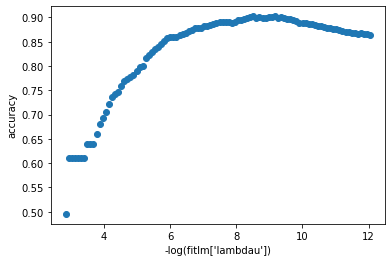

In [281]:
plt.scatter(-np.log(fitlm['lambdau']), acclmv)
plt.xlabel("-log(fitlm['lambdau'])")
plt.ylabel("accuracy");

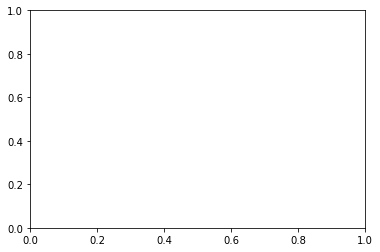

In [240]:
fig, ax = plt.subplots()

In [241]:
ax.set(xlim=0)

[(0.0, 1.0)]

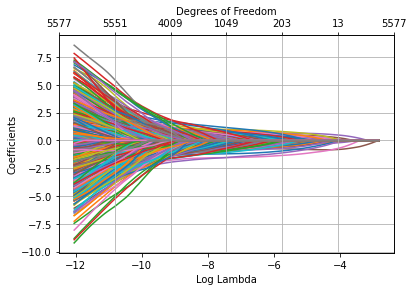

{'fig': <Figure size 432x288 with 2 Axes>,
 'ax1': <AxesSubplot:xlabel='Log Lambda', ylabel='Coefficients'>,
 'ax2': <AxesSubplot:xlabel='Degrees of Freedom'>}

In [242]:
glmnetPlot(fitlm, xvar='lambda')

In [284]:
model = keras.models.Sequential(
    [
        layers.Dense(units=16, activation='relu'),
        layers.Dense(units=16, activation='relu'),
        layers.Dense(units=1, activation='sigmoid')
    ]
)

In [285]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics='accuracy')

In [288]:
x_train_1h.tocsr()[ival_mask].shape

(2000, 10000)

In [289]:
y_train[ival_mask].shape

(2000,)

In [294]:
history = model.fit(a_train_1h.tocsr()[~ival_mask], y_train[~ival_mask], epochs=20, batch_size=512, validation_data=(a_train_1h.tocsr()[ival_mask], y_train[ival_mask]))

Epoch 1/20
45/45 [==============================] - 1s 10ms/step - loss: 0.0236 - accuracy: 0.9943 - val_loss: 0.5526 - val_accuracy: 0.8800
Epoch 2/20
45/45 [==============================] - 0s 10ms/step - loss: 0.0189 - accuracy: 0.9951 - val_loss: 0.5775 - val_accuracy: 0.8800
Epoch 3/20
45/45 [==============================] - 1s 10ms/step - loss: 0.0159 - accuracy: 0.9965 - val_loss: 0.6015 - val_accuracy: 0.8780
Epoch 4/20
45/45 [==============================] - 1s 10ms/step - loss: 0.0149 - accuracy: 0.9963 - val_loss: 0.6101 - val_accuracy: 0.8760
Epoch 5/20
45/45 [==============================] - 0s 10ms/step - loss: 0.0119 - accuracy: 0.9973 - val_loss: 0.6315 - val_accuracy: 0.8765
Epoch 6/20
45/45 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.6486 - val_accuracy: 0.8740
Epoch 7/20
45/45 [==============================] - 1s 10ms/step - loss: 0.0108 - accuracy: 0.9974 - val_loss: 0.6641 - val_accuracy: 0.8740
Epoch 8/20
45/

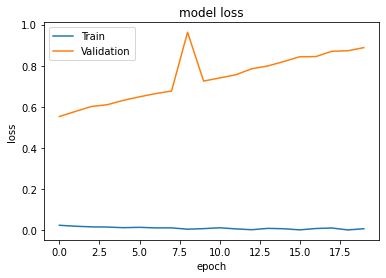

In [295]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation']);

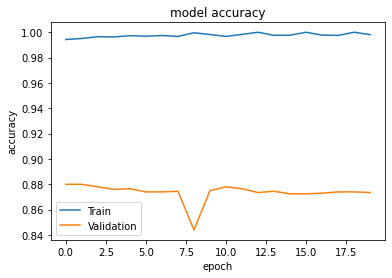

In [296]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation']);

In [297]:
history2 = model.fit(a_train_1h.tocsr()[~ival_mask], y_train[~ival_mask], epochs=20, batch_size=512, validation_data=(x_test_1h.tocsr(), y_test))

Epoch 1/20
45/45 [==============================] - 1s 28ms/step - loss: 7.8105e-04 - accuracy: 1.0000 - val_loss: 1.8276 - val_accuracy: 0.8474
Epoch 2/20
45/45 [==============================] - 1s 13ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 1.8511 - val_accuracy: 0.8460
Epoch 3/20
45/45 [==============================] - 1s 14ms/step - loss: 6.6720e-04 - accuracy: 1.0000 - val_loss: 1.8850 - val_accuracy: 0.8466
Epoch 4/20
45/45 [==============================] - 1s 14ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 1.9115 - val_accuracy: 0.8467
Epoch 5/20
45/45 [==============================] - 1s 12ms/step - loss: 5.3825e-04 - accuracy: 1.0000 - val_loss: 1.9363 - val_accuracy: 0.8472
Epoch 6/20
45/45 [==============================] - 1s 13ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 1.9603 - val_accuracy: 0.8476
Epoch 7/20
45/45 [==============================] - 1s 14ms/step - loss: 4.6063e-04 - accuracy: 1.0000 - val_loss: 1.9838 - val_accuracy: 0.84

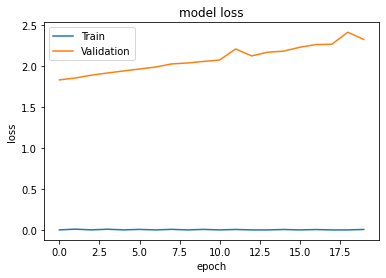

In [298]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation']);

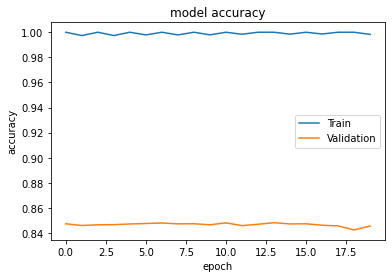

In [299]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation']);